In [1]:
import Environment
import Shop
from mab.ucb_learner import *
from utilities import *

In [2]:


shop_ts = Shop.Shop()
shop_big_ts = Shop.Shop()
shop_clairvoyant = Shop.Shop()

env = Environment.Environment(shop_ts.prices1, shop_ts.prices2, shop_ts.discounts)

shop_ts.set_conv_rate(env.true_conv1, env.true_conv2)
shop_big_ts.set_conv_rate(env.true_conv1, env.true_conv2)
shop_clairvoyant.set_conv_rate(env.true_conv1, env.true_conv2)


price_arms = [(i, j) for i in range(len(shop_ts.prices1)) for j in range(len(shop_ts.prices2))]
n_price_arms = len(price_arms)

matching_arms = [(i, j, k, l) for i in range(len(shop_ts.prices1)) for j in range(len(shop_ts.prices2)) for k in range(shop_ts.n_classes) for l in range(len(shop_ts.discounts))]
n_matching_arms = len(matching_arms)

shop_ts.set_price_learner('TS', n_price_arms)
shop_ts.set_assignment_learner('TS', n_matching_arms)

shop_big_ts.set_assignment_learner('TS', n_matching_arms)

In [3]:
generated_promo_ratios = np.array([0.4, 0.25, 0.2, 0.15])
max_ind_reward = max(env.prices1) + max(env.prices2)

In [4]:
#### get clairvoyant price
expected_rewards = np.zeros((5,5)) # price1*price2
shop_clairvoyant.set_expected_customers(np.array([25, 25, 25, 25]))
customers_mean = np.array([25, 25, 25, 25])

for i in range(len(env.prices1)):
    for j in range(env.n_classes):
        expected_reward_from_class = shop_clairvoyant.customers[j]*env.prices1[i]*env.true_conv1[j, i]
        print("Expected reward from item 1 for price-class", i, "-", j, "----->", expected_reward_from_class)
        for idx, price2 in enumerate(env.prices2):
            for k in range(len(env.discounts)):
                expected_reward_from_class += generated_promo_ratios[k]*shop_clairvoyant.customers[j]*env.true_conv1[j, i]*price2*env.true_conv2[k, j, idx]*(1 - env.discounts[k])
            expected_rewards[i][idx] += expected_reward_from_class

        print("Expected Reward for Price", i, "from class", j, "--->", expected_reward_from_class)
        print("************")

print(env.prices1)
print(expected_rewards)

clairvoyant_price1_idx, clairvoyant_price2_idx = np.unravel_index(np.argmax(expected_rewards), expected_rewards.shape)
clairvoyant_price1 = env.prices1[clairvoyant_price1_idx]
clairvoyant_price2 = env.prices2[clairvoyant_price2_idx]

Expected reward from item 1 for price-class 0 - 0 -----> 1961.0616703898359
Expected Reward for Price 0 from class 0 ---> 8963.51907082549
************
Expected reward from item 1 for price-class 0 - 1 -----> 1743.4308350504875
Expected Reward for Price 0 from class 1 ---> 10321.200246002849
************
Expected reward from item 1 for price-class 0 - 2 -----> 1058.959440900788
Expected Reward for Price 0 from class 2 ---> 6656.070855981528
************
Expected reward from item 1 for price-class 0 - 3 -----> 1781.8133943148903
Expected Reward for Price 0 from class 3 ---> 8686.440881384673
************
Expected reward from item 1 for price-class 1 - 0 -----> 2910.882247730787
Expected Reward for Price 1 from class 0 ---> 9840.23391650221
************
Expected reward from item 1 for price-class 1 - 1 -----> 2339.697081845423
Expected Reward for Price 1 from class 1 ---> 10013.98376458115
************
Expected reward from item 1 for price-class 1 - 2 -----> 1493.205197920578
Expected Re

In [5]:
#get clairvoyant promo fractions


cec = shop_clairvoyant.get_customer_list()
cep = shop_clairvoyant.get_promo_list(generated_promo_ratios)

cmt = shop_clairvoyant.get_clairvoyant_matching(cec, cep, clairvoyant_price1_idx, clairvoyant_price2_idx)

clairvoyant_promo_fractions = shop_clairvoyant.get_promo_fractions_from_tuples(cmt)

print(clairvoyant_promo_fractions)
print(clairvoyant_price1)
print(clairvoyant_price2)
print(np.max(expected_rewards))

[[0.  1.  0.  0. ]
 [0.6 0.  0.4 0. ]
 [1.  0.  0.  0. ]
 [0.  0.  0.4 0.6]]
120.0
300.0
34815.2554182252


In [6]:
##### other way to calculate clairvoyant
cec = shop_clairvoyant.get_customer_list()
cep = shop_clairvoyant.get_promo_list(generated_promo_ratios)

cmt, cpa, cer  = shop_clairvoyant.get_clairvoyant_prices_and_matching(cec, cep, 5, 5)

cp1idx = price_arms[cpa][0]
cp2idx = price_arms[cpa][1]
cp1 = env.prices1[cp1idx]
cp2 = env.prices2[cp2idx]

cpf = shop_clairvoyant.get_promo_fractions_from_tuples(cmt)

print(cpf)
print(cp1)
print(cp2)
print(cer)

[[0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.6 0.  0.4 0. ]
 [0.  0.  0.4 0.6]]
120.0
200.0
16234.864785876405


In [8]:
cep

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
days = 365

ts_rewards_per_class_per_day = []
big_ts_rewards_per_class_per_day = []
c_rewards_per_class_per_day = []
calt_rewards_per_class_per_day = []

customers_em = np.array([0, 0, 0, 0])
customers_ie = np.array([25, 25, 25, 25])

for day in range(days):
    if day == 0:
        #shop_ucb.set_expected_customers(customers_ie)
        shop_ts.set_expected_customers(customers_ie)
        shop_big_ts.set_expected_customers(customers_ie)
    else:
        customers_em = (customers_em*(day-1) + env.customers) / day
        #shop_ucb.set_expected_customers((customers_em + 0.99).astype(int))
        shop_ts.set_expected_customers((customers_em + 0.99).astype(int))
        shop_big_ts.set_expected_customers((customers_em + 0.99).astype(int))
    
    # select the price for 2 step learner
    chosen_price_tuple_idx_ts = shop_ts.price_learner.pull_arm()

    price1idx_ts = price_arms[chosen_price_tuple_idx_ts][0]
    price2idx_ts = price_arms[chosen_price_tuple_idx_ts][1]
    price1_ts = env.prices1[price_arms[chosen_price_tuple_idx_ts][0]]
    price2_ts = env.prices2[price_arms[chosen_price_tuple_idx_ts][1]]

    # perform matching and get promo fractions for 2 step learner
    expected_customers_ts = shop_ts.get_customer_list()
    expected_promos_ts = shop_ts.get_promo_list(generated_promo_ratios)
    matched_tuples_ts = shop_ts.assignment_learner.pull_arm_matching(expected_customers_ts, expected_promos_ts, matching_arms, price1idx_ts, price2idx_ts)
    promo_fractions_ts = shop_ts.get_promo_fractions_from_tuples(matched_tuples_ts)

    # get promo fractions and prices for big learner
    expected_customers_big_ts = shop_big_ts.get_customer_list()
    expected_promos_big_ts = shop_big_ts.get_promo_list(generated_promo_ratios)
    matched_tuples_big_ts, price_arm_index_big_ts = shop_big_ts.assignment_learner.pull_arm_all(expected_customers_big_ts, expected_promos_big_ts, matching_arms, len(env.prices1), len(env.prices2))
    promo_fractions_big_ts = shop_big_ts.get_promo_fractions_from_tuples(matched_tuples_big_ts)

    price1idx_big_ts = price_arms[price_arm_index_big_ts][0]
    price2idx_big_ts = price_arms[price_arm_index_big_ts][1]
    price1_big_ts = env.prices1[price1idx_big_ts]
    price2_big_ts = env.prices2[price2idx_big_ts]

    # simulate the day
    env.generate_next_day_customers()

    enum_customers = list(enumerate(env.customers))
    customers = np.concatenate([np.ones(c).astype(int)*p for p,c in enum_customers])
    np.random.shuffle(customers)

    revenue_ts = []
    revenue_big_ts = []
    revenue_c = []
    revenue_calt = []

    big_ts_total_reward = 0
    ts_total_reward = 0
    c_total_reward = 0

    c_count = 0

    for cust in customers:
        ts_ind_reward = 0

        selected_promo_ts = np.random.choice([0, 1, 2, 3], 1, p=promo_fractions_ts[cust])
        selected_promo_big_ts = np.random.choice([0, 1, 2, 3], 1, p=promo_fractions_big_ts[cust])
        selected_promo_c = np.random.choice([0, 1, 2, 3], 1, p=clairvoyant_promo_fractions[cust])
        selected_promo_calt = np.random.choice([0, 1, 2, 3], 1, p=cpf[cust])

        ts_buy1 = env.round1(cust, price1_ts)
        ts_buy2 = 0
        if ts_buy1:
            ts_buy2 = env.round2(cust, selected_promo_ts, price2_ts)

        big_ts_buy1 = env.round1(cust, price1_big_ts)
        big_ts_buy2 = 0
        if big_ts_buy1:
            big_ts_buy2 = env.round2(cust, selected_promo_big_ts, price2_big_ts)

        c_buy1 = env.round1(cust, clairvoyant_price1)
        c_buy2 = 0
        if c_buy1:
            c_buy2 = env.round2(cust, selected_promo_c, clairvoyant_price2)

        calt_buy1 = env.round1(cust, cp1)
        calt_buy2 = 0
        if calt_buy1:
            calt_buy2 = env.round2(cust, selected_promo_calt, cp2)
        
        ts_ind_reward = ts_buy1*price1_ts + ts_buy2*price2_ts*(1-shop_ts.discounts[selected_promo_ts])
        big_ts_ind_reward = big_ts_buy1*price1_big_ts + big_ts_buy2*price2_big_ts*(1-shop_big_ts.discounts[selected_promo_big_ts])
        c_ind_reward = c_buy1*clairvoyant_price1 + c_buy2*clairvoyant_price2*(1-shop_ts.discounts[selected_promo_c])
        calt_ind_reward = calt_buy1*cp1 + calt_buy2*cp2*(1-shop_ts.discounts[selected_promo_calt])
        
        norm_ts_ind_reward = ts_ind_reward / max_ind_reward
        norm_big_ts_ind_reward = big_ts_ind_reward / max_ind_reward

        # update price learner and assignment learner
        shop_ts.price_learner.update(chosen_price_tuple_idx_ts, norm_ts_ind_reward)

        matching_arm_index_ts = matching_arms.index((price1idx_ts, price2idx_ts, cust, selected_promo_ts))
        shop_ts.assignment_learner.update(matching_arm_index_ts, norm_ts_ind_reward)

        # buradaki matching arm index sadece price ikilisini veriyor
        matching_arm_index_big_ts = matching_arms.index((price1idx_big_ts, price2idx_big_ts, cust, selected_promo_big_ts))
        shop_big_ts.assignment_learner.update(matching_arm_index_big_ts, norm_big_ts_ind_reward)

        revenue_ts.append(ts_ind_reward)
        revenue_big_ts.append(big_ts_ind_reward)
        revenue_c.append(c_ind_reward)
        revenue_calt.append(calt_ind_reward)

    ts_rewards_per_class_per_day.append(np.mean(revenue_ts))
    big_ts_rewards_per_class_per_day.append(np.mean(revenue_big_ts))
    c_rewards_per_class_per_day.append(np.mean(revenue_c))
    calt_rewards_per_class_per_day.append(np.mean(revenue_calt))









In [7]:
print(np.cumsum(c_rewards_per_class_per_day)[-1] - np.cumsum(ts_rewards_per_class_per_day)[-1])
print(np.cumsum(c_rewards_per_class_per_day)[-1] - np.cumsum(big_ts_rewards_per_class_per_day)[-1])

-8396.282182377727
-2021.3478024657525


Text(0, 0.5, 'Revenue')

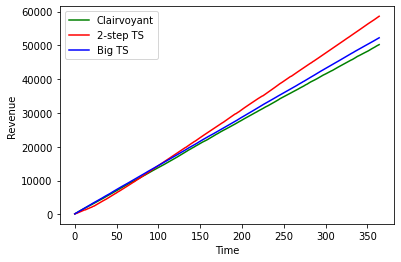

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(c_rewards_per_class_per_day), color='green', label='Clairvoyant')
plt.plot(np.cumsum(calt_rewards_per_class_per_day), color='orange', label='Clairvoyant Alt')
plt.plot(np.cumsum(ts_rewards_per_class_per_day), color='red', label='2-step TS')
plt.plot(np.cumsum(big_ts_rewards_per_class_per_day), color='blue', label='Big TS')
#plt.plot(np.cumsum(c_expected_per_day), color='black', label='Expected')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Revenue')

Text(0, 0.5, 'Regret')

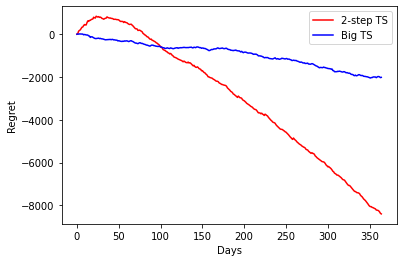

In [9]:
plt.plot(np.cumsum(np.array(c_rewards_per_class_per_day) - np.array(ts_rewards_per_class_per_day)), color='red', label='2-step TS')
plt.plot(np.cumsum(np.array(c_rewards_per_class_per_day) - np.array(big_ts_rewards_per_class_per_day)), color='blue', label='Big TS')

plt.legend()
plt.xlabel('Days')
plt.ylabel('Regret')

In [14]:
matching_arms

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 0, 2),
 (0, 0, 0, 3),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 2),
 (0, 0, 1, 3),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 0, 2, 2),
 (0, 0, 2, 3),
 (0, 0, 3, 0),
 (0, 0, 3, 1),
 (0, 0, 3, 2),
 (0, 0, 3, 3),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 2),
 (0, 1, 0, 3),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 2),
 (0, 1, 1, 3),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 1, 2, 2),
 (0, 1, 2, 3),
 (0, 1, 3, 0),
 (0, 1, 3, 1),
 (0, 1, 3, 2),
 (0, 1, 3, 3),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 0, 2),
 (0, 2, 0, 3),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 1, 2),
 (0, 2, 1, 3),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (0, 2, 2, 2),
 (0, 2, 2, 3),
 (0, 2, 3, 0),
 (0, 2, 3, 1),
 (0, 2, 3, 2),
 (0, 2, 3, 3),
 (0, 3, 0, 0),
 (0, 3, 0, 1),
 (0, 3, 0, 2),
 (0, 3, 0, 3),
 (0, 3, 1, 0),
 (0, 3, 1, 1),
 (0, 3, 1, 2),
 (0, 3, 1, 3),
 (0, 3, 2, 0),
 (0, 3, 2, 1),
 (0, 3, 2, 2),
 (0, 3, 2, 3),
 (0, 3, 3, 0),
 (0, 3, 3, 1),
 (0, 3, 3, 2),
 (0, 3, 3, 3),
 (0, 4, 0, 0),
 (0, 4, 0, 1),
 (0, 4, 0,

In [7]:
cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-cost)
cost[row_ind, col_ind].sum()

11